In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")

C:\Users\vasu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(181691, 135)

In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### Retaining only useful columns

In [5]:
df1=df[["country_txt","region_txt","city","latitude","longitude","success","suicide","attacktype1_txt","targtype1_txt","weaptype1_txt","nkill","propextent"]]

In [6]:
df1.shape

(181691, 12)

In [7]:
df1.columns

Index(['country_txt', 'region_txt', 'city', 'latitude', 'longitude', 'success',
       'suicide', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'nkill',
       'propextent'],
      dtype='object')

In [8]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [9]:
import folium

### Checking which country has highest number of terrorist attacks (success and failures both)

In [10]:
a=df1["country_txt"].value_counts()

In [11]:
a

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
Antigua and Barbuda        1
Vatican City               1
Wallis and Futuna          1
North Korea                1
South Vietnam              1
Name: country_txt, Length: 205, dtype: int64

In [12]:
df2=df1["country_txt"].value_counts().rename_axis("country").to_frame("counts")

In [13]:
df2

,counts
country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
...,...
Antigua and Barbuda,1
Vatican City,1
Wallis and Futuna,1


In [14]:
df3=df2.set_index("counts")

In [15]:
df3

""
counts
24636
14368
12731
11960
8306
...
1
1
1


In [16]:
df2

,counts
country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
...,...
Antigua and Barbuda,1
Vatican City,1
Wallis and Futuna,1


In [17]:
del df3

In [18]:
df3= df2.query('counts>=500')

In [19]:
df3

,counts
country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


In [20]:
%matplotlib inline

In [21]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import  figure

In [22]:
df3.columns

Index(['counts'], dtype='object')

In [78]:
df41=df3.reset_index(level=0)

In [79]:
df41

,country,counts
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


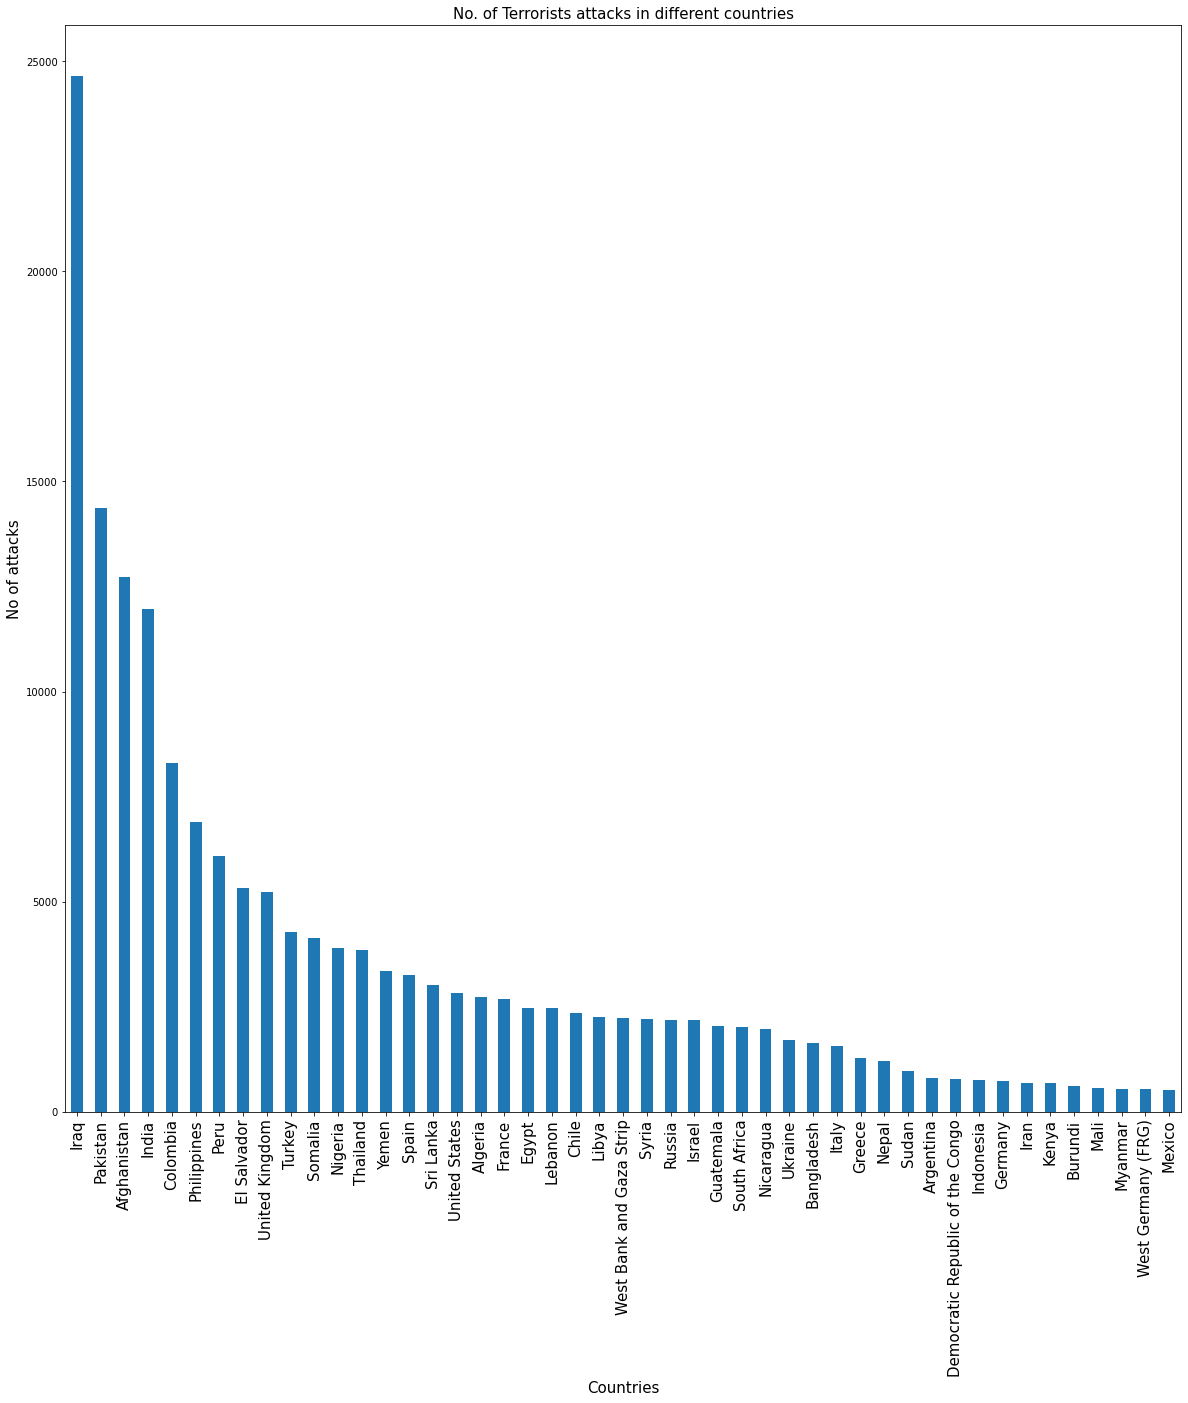

In [25]:
figure(figsize=(20,20))
df3["counts"].plot(kind="bar")
plt.title("No. of Terrorists attacks in different countries", fontsize=15)
plt.ylabel("No of attacks", fontsize=15)
plt.xlabel("Countries",fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Iran has maximum terrorist activities over the period of 50 years.

### Stats for various attack types

In [144]:
df4=df1["attacktype1_txt"].value_counts().rename_axis("Attack Type").to_frame("counts")

In [145]:
df4

,counts
Attack Type,
Bombing/Explosion,88255
Armed Assault,42669
Assassination,19312
Hostage Taking (Kidnapping),11158
Facility/Infrastructure Attack,10356
Unknown,7276
Unarmed Assault,1015
Hostage Taking (Barricade Incident),991
Hijacking,659


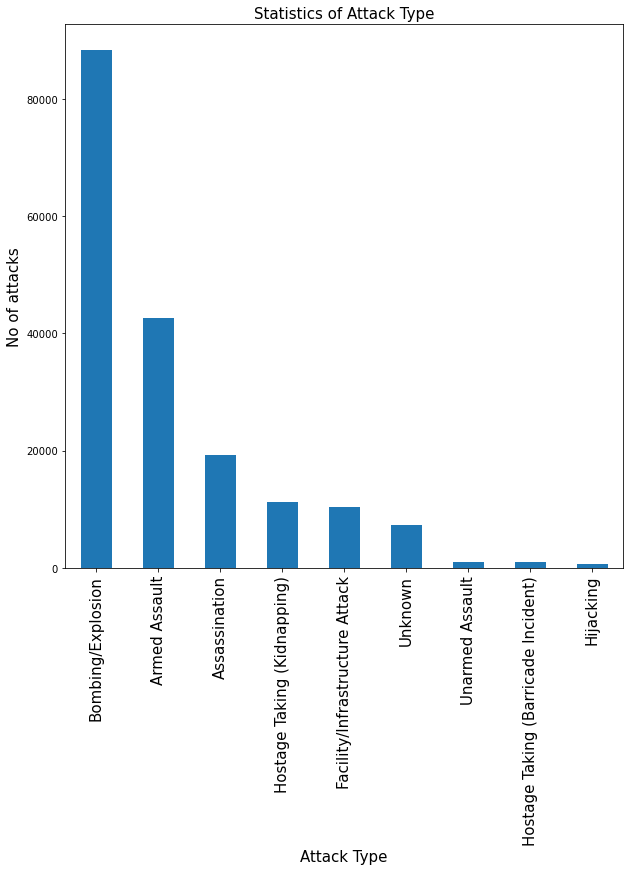

In [28]:
figure(figsize=(10,10))
df4["counts"].plot(kind="bar")
plt.title("Statistics of Attack Type", fontsize=15)
plt.ylabel("No of attacks", fontsize=15)
plt.xlabel("Attack Type",fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Checking the number of success and failures for each attack type

In [29]:
df1['success'].value_counts()

1    161632
0     20059
Name: success, dtype: int64

In [30]:
df4.nunique()

counts    9
dtype: int64

In [31]:
161632+20059

181691

In [32]:
df5=df1.query('success ==0')

In [33]:
import array

In [34]:
b1=0
b2=0
b3=0
b4=0
b5=0
b6=0
b7=0
b8=0
b9=0
for at in df5["attacktype1_txt"]:
    if at=="Bombing/Explosion" :
        b1=b1+1
    if at=="Armed Assault" :
        b2=b2+1    
    if at=="Assassination" :
        b3=b3+1    
    if at=="Hostage Taking (Kidnapping)" :
        b4=b4+1   
    if at=="Facility/Infrastructure Attack" :
        b5=b5+1 
    if at=="Unknown" :
        b6=b6+1
    if at=="Unarmed Assault" :
        b7=b7+1  
    if at=="Hostage Taking (Barricade Incident)" :
        b8=b8+1  
    if at=="Hijacking" :
        b9=b9+1      

In [35]:
c=[b1,b2,b3,b4,b5,b6,b7,b8,b9]

In [36]:
c

[10725, 2324, 4697, 251, 577, 1261, 136, 8, 80]

In [37]:
df6=df1.query('success ==1')

In [38]:
b1=0
b2=0
b3=0
b4=0
b5=0
b6=0
b7=0
b8=0
b9=0
for at in df6["attacktype1_txt"]:
    if at=="Bombing/Explosion" :
        b1=b1+1
    if at=="Armed Assault" :
        b2=b2+1    
    if at=="Assassination" :
        b3=b3+1    
    if at=="Hostage Taking (Kidnapping)" :
        b4=b4+1   
    if at=="Facility/Infrastructure Attack" :
        b5=b5+1 
    if at=="Unknown" :
        b6=b6+1
    if at== "Unarmed Assault":
        b7=b7+1  
    if at=="Hostage Taking (Barricade Incident)" :
        b8=b8+1  
    if at=="Hijacking" :
        b9=b9+1     

In [39]:
d=[b1,b2,b3,b4,b5,b6,b7,b8,b9]

In [40]:
d

[77530, 40345, 14615, 10907, 9779, 6015, 879, 983, 579]

In [41]:
c

[10725, 2324, 4697, 251, 577, 1261, 136, 8, 80]

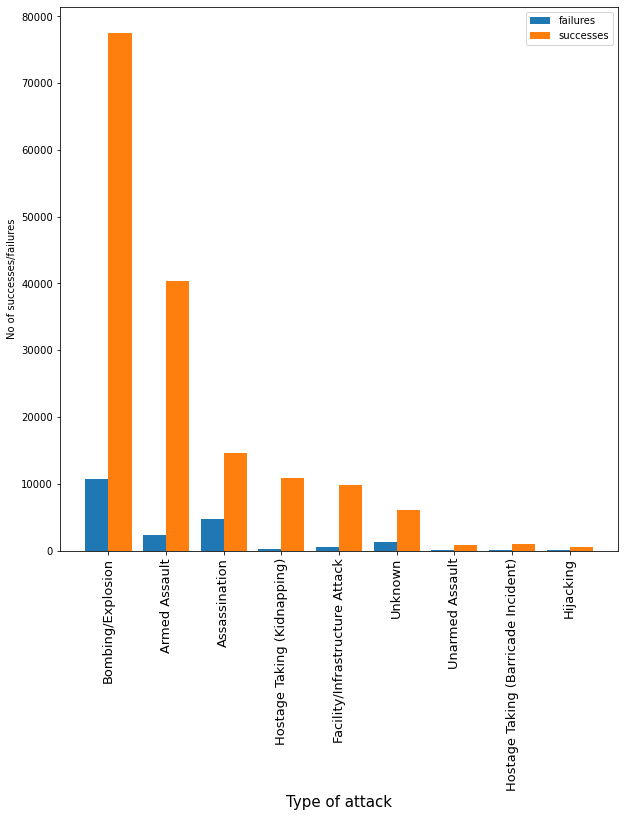

In [43]:
figure(figsize=(10,10))
x=np.arange(9)
width=0.4
plt.bar(x-0.2,c,width,label="failures")
plt.bar(x+0.2,d,width,label='successes')
plt.xlabel("Type of attack",fontsize=15)
plt.xticks(x,["Bombing/Explosion","Armed Assault","Assassination","Hostage Taking (Kidnapping)","Facility/Infrastructure Attack","Unknown","Unarmed Assault","Hostage Taking (Barricade Incident)","Hijacking"],rotation=90,fontsize=13)
plt.ylabel('No of successes/failures')
plt.legend()

### Success outnumbers failure

### Analysis on number of kills

In [45]:
df7=df1[["nkill","attacktype1_txt","success"]]

In [46]:
df7

,nkill,attacktype1_txt,success
0,1.0,Assassination,1
1,0.0,Hostage Taking (Kidnapping),1
2,1.0,Assassination,1
3,NaN,Bombing/Explosion,1
4,NaN,Facility/Infrastructure Attack,1
...,...,...,...
181686,1.0,Armed Assault,1
181687,2.0,Bombing/Explosion,1
181688,0.0,Facility/Infrastructure Attack,1
181689,0.0,Bombing/Explosion,0


In [47]:
df7["nkill"].unique()

array([1.000e+00, 0.000e+00,       nan, 7.000e+00, 4.700e+01, 2.000e+00,
       3.600e+01, 5.000e+00, 3.000e+00, 4.000e+00, 2.500e+01, 1.500e+01,
       2.600e+01, 8.000e+00, 8.100e+01, 6.000e+00, 9.000e+00, 1.600e+01,
       3.000e+01, 3.100e+01, 1.200e+01, 2.100e+01, 1.400e+01, 8.800e+01,
       1.100e+01, 1.000e+01, 2.700e+01, 1.800e+01, 2.200e+01, 1.900e+01,
       9.200e+01, 1.300e+01, 7.300e+01, 1.000e+02, 4.200e+01, 4.300e+01,
       1.700e+01, 9.800e+01, 4.220e+02, 4.800e+01, 3.400e+01, 5.400e+01,
       5.000e+01, 3.500e+01, 2.000e+01, 4.100e+01, 3.700e+01, 2.800e+01,
       4.000e+01, 3.200e+01, 8.500e+01, 2.300e+01, 3.000e+02, 6.000e+01,
       2.400e+01, 5.800e+01, 7.000e+01, 8.700e+01, 4.500e+01, 3.800e+01,
       2.900e+01, 7.400e+01, 8.300e+01, 9.000e+01, 6.600e+01, 8.000e+01,
       6.700e+01, 5.100e+01, 3.900e+01, 1.140e+02, 1.240e+02, 7.600e+01,
       3.300e+01, 7.500e+01, 5.700e+01, 6.200e+01, 4.600e+01, 5.600e+01,
       6.300e+01, 1.200e+02, 1.020e+02, 7.800e+01, 

In [50]:
df7.dropna(subset=['nkill'],axis=0, inplace=True)

<ipython-input-50-d96ac223ff81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.dropna(subset=['nkill'],axis=0, inplace=True)


In [51]:
df7

,nkill,attacktype1_txt,success
0,1.0,Assassination,1
1,0.0,Hostage Taking (Kidnapping),1
2,1.0,Assassination,1
5,0.0,Armed Assault,1
6,0.0,Assassination,0
...,...,...,...
181686,1.0,Armed Assault,1
181687,2.0,Bombing/Explosion,1
181688,0.0,Facility/Infrastructure Attack,1
181689,0.0,Bombing/Explosion,0


In [52]:
df7.isna()

,nkill,attacktype1_txt,success
0,False,False,False
1,False,False,False
2,False,False,False
5,False,False,False
6,False,False,False
...,...,...,...
181686,False,False,False
181687,False,False,False
181688,False,False,False
181689,False,False,False


In [53]:
df8=df7.query("success==0")

In [55]:
df8['nkill'].unique()

array([  0.,   2.,   1.,   5.,   4.,   8.,   3.,   6.,  13.,   7.,  20.,
        17.,   9.,  15.,  14.,  10.,  12.,  21.,  16.,  37.,  30.,  25.,
        11.,  22.,  18.,  23.,  19.,  28.,  26.,  41.,  40.,  24.,  47.,
        35.,  53.,  36.,  45.,  55.,  27.,  60.,  63.,  33.,  73.,  72.,
        67., 100.,  54.,  34.,  75.,  93.,  39.,  32.,  49., 151.,  29.,
        92.])

### Even though attack isnt a success, people have still been killed.

### Plotting no. of kills for each attack type

In [57]:
q1=df7.query("attacktype1_txt=='Bombing/Explosion'")
q2=df7.query("attacktype1_txt=='Armed Assault'")
q3=df7.query("attacktype1_txt=='Assassination'")
q4=df7.query("attacktype1_txt=='Hostage Taking (Kidnapping)'")
q5=df7.query("attacktype1_txt=='Facility/Infrastructure Attack'")
q6=df7.query("attacktype1_txt=='Unknown'")
q7=df7.query("attacktype1_txt=='Unarmed Assault'")
q8=df7.query("attacktype1_txt=='Hostage Taking (Barricade Incident)'")
q9=df7.query("attacktype1_txt=='Hijacking'")


In [60]:
b1=0
b2=0
b3=0
b4=0
b5=0
b6=0
b7=0
b8=0
b9=0
for i in q1["nkill"]:
    b1=b1+i
for i in q2["nkill"]:
    b2=b2+i
for i in q3["nkill"]:
    b3=b3+i
for i in q4["nkill"]:
    b4=b4+i
for i in q5["nkill"]:
    b5=b5+i
for i in q6["nkill"]:
    b6=b6+i    
for i in q7["nkill"]:
    b7=b7+i  
for i in q8["nkill"]:
    b8=b8+i
for i in q9["nkill"]:
    b9=b9+i    

In [63]:
q=[b1,b2,b3,b4,b5,b6,b7,b8,b9]

In [64]:
q

[157321.0, 160297.0, 24920.0, 24231.0, 3642.0, 32381.0, 880.0, 4478.0, 3718.0]

In [66]:
summ=0
for i in q:
    summ=summ+i

In [67]:
summ

411868.0

In [68]:
df7["nkill"].sum()

411868.0

Text(0, 0.5, 'no of kills')

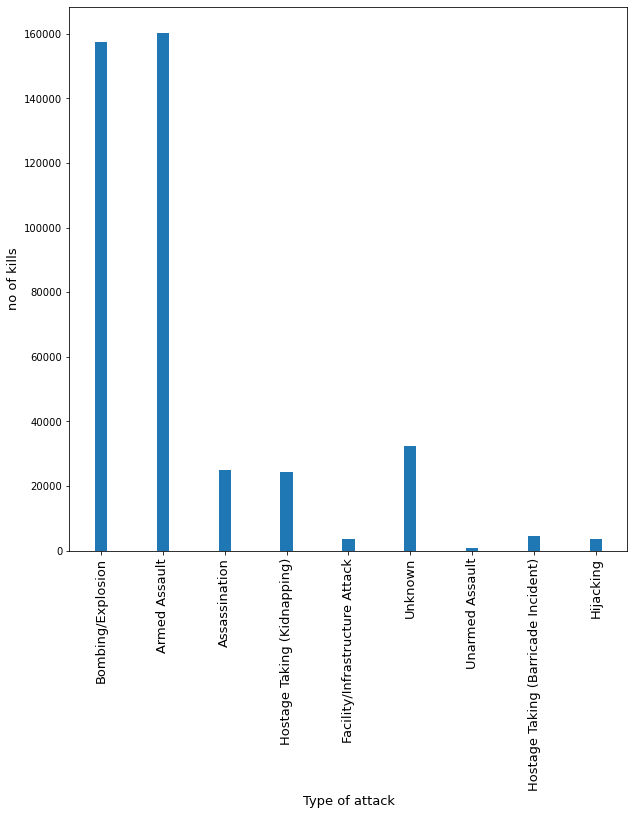

In [75]:
figure(figsize=(10,10))
x=np.arange(9)
width=0.2
plt.bar(x,q,width)
plt.xticks(x,["Bombing/Explosion","Armed Assault","Assassination","Hostage Taking (Kidnapping)","Facility/Infrastructure Attack","Unknown","Unarmed Assault","Hostage Taking (Barricade Incident)","Hijacking"],rotation=90,fontsize=13)
plt.xlabel("Type of attack",fontsize=13)
plt.ylabel("no of kills",fontsize=13)


### no of kills are most for armed assault and bombing/ explosion.

### Calculating correlation between no of kills and extent of terrorsim in each country.

In [76]:
df9=df1[["country_txt","nkill"]]

In [80]:
df41.head()

,country,counts
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306


In [81]:
df11=df9.groupby(['country_txt'],as_index=False).sum()

In [82]:
df11

,country_txt,nkill
0,Afghanistan,39384.0
1,Albania,42.0
2,Algeria,11066.0
3,Andorra,0.0
4,Angola,3043.0
...,...,...
200,Yemen,8776.0
201,Yugoslavia,119.0
202,Zaire,324.0
203,Zambia,70.0


In [86]:
df11.rename(columns={"country_txt":"country"},inplace=True)
df11

,country,nkill
0,Afghanistan,39384.0
1,Albania,42.0
2,Algeria,11066.0
3,Andorra,0.0
4,Angola,3043.0
...,...,...
200,Yemen,8776.0
201,Yugoslavia,119.0
202,Zaire,324.0
203,Zambia,70.0


In [106]:
df2=df2.set_index("country")

In [107]:
df2.head()


,counts
country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306


In [108]:
df11=df11.set_index("country")

In [109]:
df11.head()

,nkill
country,
Afghanistan,39384.0
Albania,42.0
Algeria,11066.0
Andorra,0.0
Angola,3043.0


In [110]:
df12=pd.concat([df11,df2],axis=1)

In [111]:
df12

,nkill,counts
Afghanistan,39384.0,12731
Albania,42.0,80
Algeria,11066.0,2743
Andorra,0.0,1
Angola,3043.0,499
...,...,...
Yemen,8776.0,3347
Yugoslavia,119.0,203
Zaire,324.0,50
Zambia,70.0,62


In [114]:
df12=df12.reset_index(level=0)

In [115]:
df12.rename(columns={"index":"country"})

,country,nkill,counts
0,Afghanistan,39384.0,12731
1,Albania,42.0,80
2,Algeria,11066.0,2743
3,Andorra,0.0,1
4,Angola,3043.0,499
...,...,...,...
200,Yemen,8776.0,3347
201,Yugoslavia,119.0,203
202,Zaire,324.0,50
203,Zambia,70.0,62


In [119]:
a=df12["nkill"]
b=df12['counts']
corr=a.corr(b)
corr

0.9230393042273576

### There is a strong positive correlation between nkill and counts.

### Property damage extent vs Attack type

In [120]:
df13=df1[['propextent','attacktype1_txt']]

In [121]:
df14=df13.groupby(["attacktype1_txt"],as_index=False).sum()

In [122]:
df14

,attacktype1_txt,propextent
0,Armed Assault,42768.0
1,Assassination,8851.0
2,Bombing/Explosion,124932.0
3,Facility/Infrastructure Attack,22884.0
4,Hijacking,699.0
5,Hostage Taking (Barricade Incident),1769.0
6,Hostage Taking (Kidnapping),4770.0
7,Unarmed Assault,560.0
8,Unknown,3887.0


Text(0, 0.5, 'Extent of property damage (in money units)')

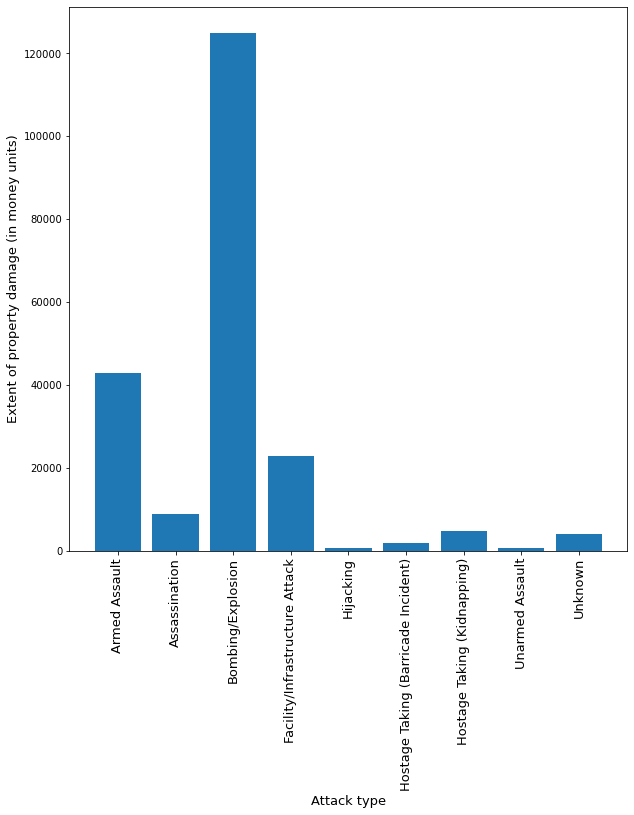

In [127]:
figure(figsize=(10,10))
plt.bar(df14["attacktype1_txt"],df14["propextent"])
plt.xlabel("Attack type",fontsize=13)
plt.xticks(rotation=90,fontsize=13)
plt.ylabel("Extent of property damage (in money units)",fontsize=13)

### The extent of property damage is most in Bombing/Explosion attacks.

### Correlation between attack type counts and property damage extent.

In [147]:
df4

,counts
Attack Type,
Bombing/Explosion,88255
Armed Assault,42669
Assassination,19312
Hostage Taking (Kidnapping),11158
Facility/Infrastructure Attack,10356
Unknown,7276
Unarmed Assault,1015
Hostage Taking (Barricade Incident),991
Hijacking,659


In [134]:
df14=df14.rename(columns={'attacktype1_txt':'Attack Type'})

In [135]:
df15=df14.set_index("Attack Type")

In [136]:
df15

,propextent
Attack Type,
Armed Assault,42768.0
Assassination,8851.0
Bombing/Explosion,124932.0
Facility/Infrastructure Attack,22884.0
Hijacking,699.0
Hostage Taking (Barricade Incident),1769.0
Hostage Taking (Kidnapping),4770.0
Unarmed Assault,560.0
Unknown,3887.0


In [148]:
df16=pd.concat([df15,df4],axis=1)

In [149]:
df16

,propextent,counts
Armed Assault,42768.0,42669
Assassination,8851.0,19312
Bombing/Explosion,124932.0,88255
Facility/Infrastructure Attack,22884.0,10356
Hijacking,699.0,659
Hostage Taking (Barricade Incident),1769.0,991
Hostage Taking (Kidnapping),4770.0,11158
Unarmed Assault,560.0,1015
Unknown,3887.0,7276


In [150]:
a=df16["propextent"]
b=df16['counts']
corr=a.corr(b)

In [151]:
corr

0.9754199834984713

### The extent of property damage is strongly positively related to the number of attacks